In [177]:
import pandas as pd
import numpy as np

# CSV 파일 경로 (실제 경로로 변경)
claims_df = pd.read_csv('Fixedclaims4_final.csv')
members_df = pd.read_csv('members (2).csv')
contracts_df = pd.read_csv('contracts_processed (2).csv')
# claims_processed = pd.read_csv('claims_processed (2).csv')

claims_df.columns = claims_df.columns.str.lower()
members_df.columns = members_df.columns.str.lower()
contracts_df.columns = contracts_df.columns.str.lower()
# claims_processed.columns = claims_processed.columns.str.lower()



# 데이터 확인
print(claims_df.head())
print(members_df.head())
print(contracts_df.head())

# 데이터 통합: Claim -> Member
data = claims_df.merge(members_df, on='member_id', how='left')

# 데이터 통합: Claim + Member -> Insurance_Contract
data = data.merge(contracts_df, on='contract_id', how='left')

# 통합된 데이터 확인
print(data.head())


                 accident_date status claim_id contract_id        member_id  \
0  24/07/25 00:00:00.000000000     만기  C100388  17510-0218  c15b60f3-39ab-4   
1  24/07/25 00:00:00.000000000     만기  C101509  17510-0218  c15b60f3-39ab-4   
2  24/07/25 00:00:00.000000000     만기  C101536  17510-0218  c15b60f3-39ab-4   
3  24/07/25 00:00:00.000000000     만기  C100518  17510-0218  c15b60f3-39ab-4   
4  24/07/25 00:00:00.000000000     만기  C101942  17510-0218  c15b60f3-39ab-4   

   claim_details document_issuer  documents claim_type  \
0            NaN          의심 발급처        NaN         기타   
1            NaN          의심 발급처        NaN         기타   
2            NaN          의심 발급처        NaN         기타   
3            NaN          유한회사 김        NaN       교통사고   
4            NaN         (주) 김박백        NaN       교통사고   

                 reported_date  ...  rule5_score  rule5_score_normalized  \
0  24/07/30 00:00:00.000000000  ...            0                     NaN   
1  24/07/25 00:00:00.000

In [44]:
# import pandas as pd
# import numpy as np

# # 룰별 점수 정규화 함수 정의
# def normalize_rule_scores(claims_df, rules):
#     for rule in rules:
#         if rule in claims_df.columns:
#             min_score = claims_df[rule].min()
#             max_score = claims_df[rule].max()
#             if max_score - min_score > 0:
#                 normalized_col = f'{rule}_normalized'
#                 claims_df[normalized_col] = (claims_df[rule] - min_score) / (max_score - min_score)
#             else:
#                 # 모든 점수가 동일한 경우 0으로 설정
#                 normalized_col = f'{rule}_normalized'
#                 claims_df[normalized_col] = 0
#         else:
#             # 룰 컬럼이 없는 경우 0으로 채움
#             normalized_col = f'{rule}_normalized'
#             claims_df[normalized_col] = 0
#     return claims_df

# # CSV 파일 로드
# file_path = "Fixedclaims4.csv"  # 실제 파일 경로로 변경
# claims_df = pd.read_csv(file_path)

# # 룰별 점수 정규화 적용
# rules = ['RULE1_SCORE', 'RULE2_SCORE', 'RULE3_SCORE', 'RULE4_SCORE', 'RULE5_SCORE', 'RULE6_SCORE']
# claims_df = normalize_rule_scores(claims_df, rules)

# # 정규화된 점수 확인 (상위 5개 데이터)
# print(claims_df[['RULE1_SCORE', 'RULE1_SCORE_NORMALIZED', 'RULE2_SCORE', 'RULE2_SCORE_NORMALIZED']].head())

# # 수정된 데이터를 새로운 CSV 파일로 저장
# output_file_path = "Fixedclaims4_normalized.csv"  # 저장할 파일 경로
# claims_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

# print(f"정규화된 점수를 포함한 데이터가 {output_file_path}로 저장되었습니다.")


   RULE1_SCORE  RULE1_SCORE_NORMALIZED  RULE2_SCORE  RULE2_SCORE_NORMALIZED
0            0                     NaN         40.0                     NaN
1            0                     NaN         40.0                     NaN
2           20                     NaN         40.0                     NaN
3            0                     NaN         40.0                     NaN
4            0                     NaN         40.0                     NaN
정규화된 점수를 포함한 데이터가 Fixedclaims4_normalized.csv로 저장되었습니다.


In [49]:
# claims_df = pd.read_csv("Fixedclaims4_normalized.csv")
# claims_df.head()

# # 사기 점수 기준으로 상위 200개 선택
# claims_df = claims_df.sort_values(by='FRAUD_SCORE', ascending=False).reset_index(drop=True)

# # 상위 200개에 IS_FRAUD = 1 할당
# top_n = 200
# claims_df.loc[:top_n-1, 'IS_FRAUD'] = 1

# # 상위 200개 중 30% 라벨 뒤집기
# num_flips_top = int(top_n * 0.3)
# flip_indices_top = claims_df.loc[:top_n-1].sample(n=num_flips_top, random_state=42).index
# claims_df.loc[flip_indices_top, 'IS_FRAUD'] = 0

# # 나머지 청구에 대해 IS_FRAUD = 1을 20% 확률로 할당, 나머지는 0
# remaining = claims_df.loc[top_n:]
# random_probs = np.random.rand(len(remaining))
# claims_df.loc[remaining.index, 'IS_FRAUD'] = (random_probs < 0.2).astype(int)

# claims_df.to_csv("Fixedclaims4_1.csv", index=False, encoding='utf-8-sig')


In [60]:
# # fraud_score가 존재하는지 확인
# print(data['fraud_score'].head())

# # fraud_score가 숫자형으로 변환 (필요 시)
# data['fraud_score'] = pd.to_numeric(data['fraud_score'], errors='coerce')

# # 결측치 처리 (필요 시)
# data['fraud_score'].fillna(0, inplace=True)

# # 임계값 설정: 상위 5%를 사기로 간주 (예: 95th percentile)
# threshold = data['fraud_score'].quantile(0.9)
# print(f"Selected Fraud Threshold (95th percentile): {threshold}")

# # is_fraud 레이블 생성
# data['is_fraud'] = (data['fraud_score'] >= threshold).astype(int)

# # 레이블 분포 확인
# print(data['is_fraud'].value_counts(normalize=True))
data.columns
data.head()

,accident_date,status_x,claim_id,contract_id,member_id_x,claim_details,document_issuer,documents,claim_type,reported_date,...,claim_count,claim_frequency,email_dup_count,issuer_dup_count,claim_delay_days,quick_claim,quick_claims_flag,age,accident_month,accident_dayofweek
0,2025-07-24,0,C100388,171,c15b60f3-39ab-4,NaN,775,NaN,1,24/07/30 00:00:00.000000000,...,7,7.0,5,185,1826,0,0,37,7,3
1,2025-07-24,0,C101509,171,c15b60f3-39ab-4,NaN,775,NaN,1,24/07/25 00:00:00.000000000,...,7,7.0,5,185,0,0,0,37,7,3
2,2025-07-24,0,C101536,171,c15b60f3-39ab-4,NaN,775,NaN,1,24/08/10 00:00:00.000000000,...,7,7.0,5,185,-5448,0,0,37,7,3
3,2025-07-24,0,C100518,171,c15b60f3-39ab-4,NaN,643,NaN,0,24/08/10 00:00:00.000000000,...,7,7.0,5,23,-5448,0,0,37,7,3
4,2025-07-24,0,C101942,171,c15b60f3-39ab-4,NaN,151,NaN,0,24/08/23 00:00:00.000000000,...,7,7.0,5,0,-700,0,0,37,7,3


In [178]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import json
# 1. 청구 건수 (claim_count) 계산
claim_counts = claims_df.groupby('contract_id')['claim_id'].count().reset_index()
claim_counts.columns = ['contract_id', 'claim_count']

# 2. `data`에 claim_count 병합
data = data.merge(claim_counts, on='contract_id', how='left')

# 룰 1: 과거 사기 횟수는 이미 `fraud_count`로 존재

# 룰 2: 계약 기간 대비 청구 빈도
data['claim_frequency'] = data['claim_count'] / data['contract_days']

# 룰 3: 이메일 중복 사용 횟수 (email_dup_count)
email_counts = members_df['email'].value_counts()
data['email_dup_count'] = data['email'].map(email_counts)
data['email_dup_count'] = data['email_dup_count'] - 1  # 자기 자신을 제외한 중복 횟수로 계산
data['email_dup_count'] = data['email_dup_count'].apply(lambda x: max(x, 0))  # 음수 값은 0으로 변환

# 룰 4: 동일 서류 발급처를 통한 청구 중복 횟수 (issuer_dup_count)
issuer_counts = claims_df['document_issuer'].value_counts()
data['issuer_dup_count'] = data['document_issuer'].map(issuer_counts)
data['issuer_dup_count'] = data['issuer_dup_count'] - 1  # 자기 자신을 제외한 중복 횟수로 계산
data['issuer_dup_count'] = data['issuer_dup_count'].apply(lambda x: max(x, 0))  # 음수 값은 0으로 변환

# 룰 5: 청구 제출 지연 일수

data['claim_delay_days'] = (pd.to_datetime(data['reported_date'], format='%y/%m/%d %H:%M:%S.%f') - pd.to_datetime(data['accident_date'])).dt.days

# 룰 6: 계약 시작 직후 청구 발생 횟수
contract_start = contracts_df.set_index('contract_id')['start_date'].to_dict()
data['contract_start_date'] = data['contract_id'].map(contract_start)
data['accident_date'] = pd.to_datetime(data['accident_date'])
data['contract_start_date'] = pd.to_datetime(data['contract_start_date'])

# 계약 시작 후 10% 계약 기간 이내에 사고 발생 여부
data['quick_claim'] = ((data['accident_date'] - data['contract_start_date']).dt.days <= (data['contract_days'] * 0.1)).astype(int)

# 동일 계약 내의 빠른 청구 횟수
quick_claims = data[data['quick_claim'] == 1].groupby('contract_id')['claim_id'].count().reset_index()
quick_claims.columns = ['contract_id', 'quick_claims_count']
data = data.merge(quick_claims, on='contract_id', how='left')
data['quick_claims_count'].fillna(0, inplace=True)

# 룰 6: 3회 이상 빠른 청구 발생 여부
data['quick_claims_flag'] = (data['quick_claims_count'] >= 3).astype(int)

# 나이 계산 (birth_date를 나이로 변환)
data['birth_date'] = pd.to_datetime(data['birth_date'])
data['age'] = datetime.now().year - data['birth_date'].dt.year
data.drop('birth_date', axis=1, inplace=True)

# 불필요한 컬럼 제거
data.drop(['contract_start_date', 'quick_claims_count'], axis=1, inplace=True)

# 추가적인 FE: 날짜 관련 특성
data['accident_month'] = data['accident_date'].dt.month
# data['accident_dayofweek'] = data['accident_date'].dt.dayofweek

# 문자열 컬럼에 대한 Label Encoding 처리 (필요한 컬럼에 대해서만)
label_cols = ['contract_id', 'document_issuer', 'email', 'insurance_id', 'claim_type', 'status_x', 'status_y']
label_mappings = {}

# 각 문자열 컬럼을 Label Encoding 처리
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_mappings[col] = {label: int(idx) for idx, label in enumerate(le.classes_)}
    label_mappings[col]["UNKNOWN"] = -1  # 새로운 값에 대한 UNKNOWN

# 최종 FE된 데이터 확인
# print(data.head())
LGBM_data = data.copy()
# 불필요한 컬럼 제거 (필요에 따라)
columns_to_drop = ['documents','contract_start_date', 'quick_claims_count', 'password', 'name', 'phone_number', 'contractor', 'member_id_x', 'member_id_y']
LGBM_data.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

# 필요한 경우 다른 범주형 변수 인코딩 (예: claim_type, insurance_id, gender, status_x, status_y)
label_cols = ['claim_type', 'insurance_id', 'gender', 'status_x', 'status_y']

# 각 문자열 컬럼을 Label Encoding 처리
for col in label_cols:
    if col in LGBM_data.columns:
        le = LabelEncoder()
        LGBM_data[col] = le.fit_transform(LGBM_data[col].astype(str))
        label_mappings[col] = {label: int(idx) for idx, label in enumerate(le.classes_)}
        label_mappings[col]["UNKNOWN"] = -1  # 새로운 값에 대한 UNKNOWN
    else:
        print(f"Warning: Column '{col}' not found in the dataframe.")

# Save label_mappings to JSON
with open('encoding_mapping2.json', 'w') as f:
    json.dump(label_mappings, f, indent=4)


# print(LGBM_data.dtypes)
LGBM_data_sorted = LGBM_data.sort_index(axis=1).reset_index(drop=True)


C:\Users\최준혁\AppData\Local\Temp\ipykernel_21908\3829999547.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['claim_delay_days'] = (pd.to_datetime(data['reported_date'], format='%y/%m/%d %H:%M:%S.%f') - pd.to_datetime(data['accident_date'])).dt.days
C:\Users\최준혁\AppData\Local\Temp\ipykernel_21908\3829999547.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['accident_date'] = pd.to_datetime(data['accident_date'])
C:\Users\최준혁\AppData\Local\Temp\ipykernel_21908\3829999547.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

In [200]:
object_columns = LGBM_data.select_dtypes(include=['object']).columns
claim_id_to_predict = 'C100945'
only_1 = LGBM_data[LGBM_data['claim_id'] == claim_id_to_predict]
only_1_X = only_1.drop(['claim_id','claim_details', 'last_payment_date', 'reported_date', 'accident_date', 'start_date', 'end_date', 'fraud_score','is_fraud', 'estimated_fraud','rule1_score_normalized',
       'rule2_score_normalized', 'rule3_score_normalized',
       'rule4_score_normalized', 'rule5_score_normalized',
       'rule6_score_normalized' ], axis=1)
print(len(only_1_X.columns))
only_1_X_sort = only_1_X.sort_index(axis=1).reset_index(drop=True)


29


In [201]:
gbm = lgb.Booster(model_file='lightgbm_model2.txt')

# 예측 수행
y_pred_single = gbm.predict(only_1_X)
print(y_pred_single)

[0.14909171]


In [107]:
input = pd.read_csv('input_features_517.csv')
print(input.columns)
print(only_1_X.columns)

Index(['status_x', 'contract_id', 'document_issuer', 'documents', 'claim_type',
       'rule1_score', 'rule2_score', 'rule3_score', 'rule4_score',
       'rule5_score', 'rule6_score', 'identification_number', 'gender',
       'email', 'point', 'fraud_count', 'insurance_id', 'contract_days',
       'total_premium', 'status_y', 'is_reviewed', 'claim_count',
       'claim_frequency', 'email_dup_count', 'issuer_dup_count',
       'claim_delay_days', 'quick_claim', 'quick_claims_flag', 'age',
       'accident_month', 'accident_dayofweek'],
      dtype='object')

In [110]:
import pandas as pd

# 1. CSV 파일 로드
input_df = pd.read_csv('input_features_517.csv')

# 2. 'only_1' DataFrame이 이미 정의되어 있다고 가정
# 예시로 'only_1'을 CSV 파일에서 로드하는 경우:
# only_1 = pd.read_csv('only_1.csv')

# 만약 'only_1'이 이미 메모리에 존재한다면, 이 부분은 생략 가능합니다.
# 예를 들어:
# only_1 = your_existing_dataframe

# 3. 컬럼 비교
columns_match = list(input_df.columns) == list(only_1_X.columns)

if columns_match:
    print("컬럼이 동일합니다.")
else:
    print("컬럼이 다릅니다.")
    print("input_df에만 있는 컬럼:", set(input_df.columns) - set(only_1_X.columns))
    print("only_1에만 있는 컬럼:", set(only_1_X.columns) - set(input_df.columns))

# 4. 값 비교
if columns_match:
    # 전체 DataFrame이 동일한지 확인
    if input_df.equals(only_1_X):
        print("두 DataFrame의 모든 값이 동일합니다.")
    else:
        print("두 DataFrame의 값이 다릅니다.")
        
        # 차이 나는 셀 찾기
        differences = input_df != only_1_X
        differing_rows, differing_cols = differences.any(axis=1), differences.any(axis=0)
        
        # 차이 나는 행과 열 출력
        print("값이 다른 행:")
        print(input_df[differing_rows])
        
        print("\n값이 다른 열:")
        print(input_df.columns[differing_cols])
        
        # 차이 나는 셀을 별도의 DataFrame으로 저장
        diff_df = input_df[differences]
        diff_df.to_csv('differences.csv', index=False)
        print("차이 나는 셀을 'differences.csv' 파일로 저장했습니다.")
else:
    print("컬럼이 동일하지 않기 때문에 값 비교를 수행하지 않습니다.")

# 5. 데이터 확인을 위한 CSV 저장 (선택 사항)
# 두 DataFrame을 각각 CSV 파일로 저장하여 직접 비교할 수 있습니다.
input_df.to_csv('input_features_517_saved.csv', index=False)
only_1_X.to_csv('only_1_saved.csv', index=False)
print("두 DataFrame을 각각 'input_features_517_saved.csv'와 'only_1_saved.csv' 파일로 저장했습니다.")


컬럼이 다릅니다.
input_df에만 있는 컬럼: set()
only_1에만 있는 컬럼: set()
컬럼이 동일하지 않기 때문에 값 비교를 수행하지 않습니다.
두 DataFrame을 각각 'input_features_517_saved.csv'와 'only_1_saved.csv' 파일로 저장했습니다.


In [175]:
import pandas as pd

# CSV 파일 읽기
input_df = pd.read_csv('input_features_517.csv')
only_1_X_df = only_1_X.copy()

# 1. 컬럼 이름을 기준으로 순서를 맞춤
input_df_sorted = input_df.sort_index(axis=1).reset_index(drop=True)  # 인덱스를 리셋하여 순차적인 숫자로 변경
only_1_X_df_sorted = only_1_X_df.sort_index(axis=1).reset_index(drop=True)

# 2. 컬럼이 동일한지 확인
if list(input_df_sorted.columns) == list(only_1_X_df_sorted.columns):
    print("컬럼이 동일합니다.")
    
    # 3. 값이 동일한지 확인 (각 컬럼별로)
    comparison = input_df_sorted.eq(only_1_X_df_sorted)
    
    if comparison.all().all():
        print("두 DataFrame의 모든 값이 동일합니다.")
    else:
        print("일부 값이 다릅니다.")
        # 차이가 있는 부분 출력
        differing_rows = comparison[~comparison.all(axis=1)].index  # 차이가 있는 행의 인덱스 확인
        
        # 각 다른 행에서 차이나는 값을 출력
        for row in differing_rows:
            print(f"행 번호 {row}에서 차이가 있습니다:")
            for col in input_df_sorted.columns:
                val_input = input_df_sorted.loc[row, col]
                val_only_1_X = only_1_X_df_sorted.loc[row, col]
                if val_input != val_only_1_X:
                    print(f"  컬럼 '{col}': input_df = {val_input}, only_1_X_df = {val_only_1_X}")
else:
    print("컬럼이 동일하지 않습니다.")


컬럼이 동일하지 않습니다.


In [176]:
input_df_sorted.columns

Index(['accident_month', 'age', 'claim_count', 'claim_delay_days',
       'claim_frequency', 'claim_type', 'contract_days', 'contract_id',
       'document_issuer', 'email', 'email_dup_count', 'fraud_count', 'gender',
       'identification_number', 'insurance_id', 'is_reviewed',
       'issuer_dup_count', 'point', 'quick_claim', 'quick_claims_flag',
       'rule1_score', 'rule2_score', 'rule3_score', 'rule4_score',
       'rule5_score', 'rule6_score', 'status_x', 'status_y', 'total_premium'],
      dtype='object')

In [188]:
from sklearn.model_selection import train_test_split

# 독립 변수와 종속 변수 설정
X = LGBM_data_sorted.drop(['claim_id','claim_details', 'last_payment_date', 'reported_date', 'accident_date', 'start_date', 'end_date', 'fraud_score','is_fraud', 'estimated_fraud','rule1_score_normalized',
       'rule2_score_normalized', 'rule3_score_normalized',
       'rule4_score_normalized', 'rule5_score_normalized',
       'rule6_score_normalized' ], axis=1)
y = LGBM_data_sorted['is_fraud']

# 훈련 세트와 테스트 세트로 분할 (예: 80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Test labels shape: {y_test.shape}")


Training set shape: (1600, 29), Training labels shape: (1600,)
Test set shape: (400, 29), Test labels shape: (400,)


In [87]:
len(X.columns)


31

In [ ]:
pip install lightgbm optuna scikit-learn


In [7]:
import lightgbm as lgb
import optuna
from sklearn.metrics import roc_auc_score, f1_score

c:\Users\최준혁\KOPOFinalProject\FastAPI\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [189]:
import lightgbm as lgb
from sklearn.metrics import f1_score
import optuna
from sklearn.model_selection import train_test_split

# 데이터 분할 예시 (이미 X_train, X_test, y_train, y_test로 분할된 경우 생략)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def f1_metric(y_pred, data):
    """
    LightGBM의 커스텀 평가 함수는 (y_pred, data) 시그니처를 가져야 합니다.
    y_pred는 예측 확률이며, data는 Dataset 객체입니다.
    """
    y_true = data.get_label()
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    return 'f1', f1_score(y_true, y_pred_binary), True

def objective(trial):
    # 하이퍼파라미터 공간 정의 (Optuna v3.0.0 이상)
    param = {
        'objective': 'binary',
        'metric': 'None',  # 사용자 정의 평가 함수 사용
        'boosting_type': 'gbdt',
        'verbosity': -1,
        'seed': 42,
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'min_split_gain': trial.suggest_float('min_split_gain', 1e-8, 1.0, log=True),
    }

    # LightGBM 데이터셋 생성
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_valid = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # LightGBM 모델 학습
    gbm = lgb.train(
        param,
        lgb_train,
        valid_sets=[lgb_train, lgb_valid],
        num_boost_round=1000,
        callbacks=[lgb.early_stopping(stopping_rounds=100)],
        feval=f1_metric,  # 사용자 정의 F1 평가 함수 사용
    )

    # 예측 확률
    preds = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    
    # 임계값을 0.5로 설정하여 이진 예측값으로 변환
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in preds]
    
    # F1-Score 계산
    f1 = f1_score(y_test, y_pred_binary)

    return f1  # Optuna는 이 값을 최대화하도록 설정

# Optuna 스터디 생성 및 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)

print('Best trial:')
trial = study.best_trial
print(f'  Value: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


[I 2024-10-04 10:30:24,098] A new study created in memory with name: no-name-f0079f5b-0338-4b72-8afc-9949eee8e75b


Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:25,234] Trial 0 finished with value: 0.0 and parameters: {'learning_rate': 0.0001821698551322169, 'num_leaves': 58, 'max_depth': 10, 'min_data_in_leaf': 30, 'feature_fraction': 0.9808600921188525, 'bagging_fraction': 0.8016499642459736, 'bagging_freq': 2, 'lambda_l1': 8.789049917798401, 'lambda_l2': 0.0016768045877121357, 'min_split_gain': 1.1887853125457762e-08}. Best is trial 0 with value: 0.0.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:26,440] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.00014390838128275785, 'num_leaves': 59, 'max_depth': 13, 'min_data_in_leaf': 87, 'feature_fraction': 0.9097856547611699, 'bagging_fraction': 0.9036871879369518, 'bagging_freq': 5, 'lambda_l1': 6.271166464638458e-05, 'lambda_l2': 4.090842814598241e-07, 'min_split_gain': 0.28565888126476086}. Best is trial 0 with value: 0.0.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:27,674] Trial 2 finished with value: 0.0 and parameters: {'learning_rate': 0.0015063312782301458, 'num_leaves': 137, 'max_depth': 11, 'min_data_in_leaf': 75, 'feature_fraction': 0.7602056849616189, 'bagging_fraction': 0.7636645177764626, 'bagging_freq': 3, 'lambda_l1': 1.2040411100684016e-07, 'lambda_l2': 0.1605619188990412, 'min_split_gain': 0.0007168563651196294}. Best is trial 0 with value: 0.0.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:29,016] Trial 3 finished with value: 0.0 and parameters: {'learning_rate': 0.0001243968381249894, 'num_leaves': 109, 'max_depth': 8, 'min_data_in_leaf': 64, 'feature_fraction': 0.6964061697378882, 'bagging_fraction': 0.6381887702427891, 'bagging_freq': 1, 'lambda_l1': 4.015814582758958e-07, 'lambda_l2': 0.0023405231419509655, 'min_split_gain': 0.4341124616492079}. Best is trial 0 with value: 0.0.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:32,602] Trial 4 finished with value: 0.38571428571428573 and parameters: {'learning_rate': 0.06595853588506972, 'num_leaves': 150, 'max_depth': 11, 'min_data_in_leaf': 55, 'feature_fraction': 0.6150760234250311, 'bagging_fraction': 0.963347047475392, 'bagging_freq': 7, 'lambda_l1': 0.0027608401585101218, 'lambda_l2': 1.755877081014626e-07, 'min_split_gain': 0.010721281639339433}. Best is trial 4 with value: 0.38571428571428573.


Early stopping, best iteration is:
[117]	training's f1: 0.670927	valid_1's f1: 0.385714
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:35,082] Trial 5 finished with value: 0.0 and parameters: {'learning_rate': 0.0011115136116340925, 'num_leaves': 150, 'max_depth': 12, 'min_data_in_leaf': 20, 'feature_fraction': 0.6336933264974659, 'bagging_fraction': 0.8435578430992274, 'bagging_freq': 3, 'lambda_l1': 0.007321026260011336, 'lambda_l2': 6.291683462731894e-07, 'min_split_gain': 0.5682953939066366}. Best is trial 4 with value: 0.38571428571428573.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:36,670] Trial 6 finished with value: 0.0 and parameters: {'learning_rate': 0.0003121843867040795, 'num_leaves': 147, 'max_depth': 3, 'min_data_in_leaf': 53, 'feature_fraction': 0.9011685730309447, 'bagging_fraction': 0.640831479669388, 'bagging_freq': 2, 'lambda_l1': 0.009195081874603465, 'lambda_l2': 3.594261652317231e-05, 'min_split_gain': 0.017663512969451574}. Best is trial 4 with value: 0.38571428571428573.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:39,781] Trial 7 finished with value: 0.31496062992125984 and parameters: {'learning_rate': 0.012906748589400663, 'num_leaves': 104, 'max_depth': 8, 'min_data_in_leaf': 92, 'feature_fraction': 0.6240728224312538, 'bagging_fraction': 0.7614337909841478, 'bagging_freq': 6, 'lambda_l1': 1.3076630203692328e-06, 'lambda_l2': 1.1735319421676705e-07, 'min_split_gain': 0.1473860591463541}. Best is trial 4 with value: 0.38571428571428573.


Early stopping, best iteration is:
[129]	training's f1: 0.314741	valid_1's f1: 0.314961
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:43,159] Trial 8 finished with value: 0.33587786259541985 and parameters: {'learning_rate': 0.013985548013292546, 'num_leaves': 51, 'max_depth': 15, 'min_data_in_leaf': 32, 'feature_fraction': 0.7394297795603354, 'bagging_fraction': 0.7738687498377523, 'bagging_freq': 6, 'lambda_l1': 8.712681917248405e-08, 'lambda_l2': 0.00011050307994491598, 'min_split_gain': 0.007995811809269995}. Best is trial 4 with value: 0.38571428571428573.


Early stopping, best iteration is:
[122]	training's f1: 0.360396	valid_1's f1: 0.335878
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:44,338] Trial 9 finished with value: 0.0 and parameters: {'learning_rate': 0.00020754955147758648, 'num_leaves': 22, 'max_depth': 15, 'min_data_in_leaf': 85, 'feature_fraction': 0.8247267488918053, 'bagging_fraction': 0.8676831234451456, 'bagging_freq': 4, 'lambda_l1': 1.2701918567646022, 'lambda_l2': 1.4196930421796375e-05, 'min_split_gain': 0.007174261475997068}. Best is trial 4 with value: 0.38571428571428573.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:48,239] Trial 10 finished with value: 0.4217687074829932 and parameters: {'learning_rate': 0.08802390337913117, 'num_leaves': 113, 'max_depth': 7, 'min_data_in_leaf': 51, 'feature_fraction': 0.6074542072141946, 'bagging_fraction': 0.9874380669465758, 'bagging_freq': 7, 'lambda_l1': 6.356237241662919e-05, 'lambda_l2': 1.240882993069688e-08, 'min_split_gain': 5.099304213657169e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[172]	training's f1: 0.802343	valid_1's f1: 0.421769
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:52,750] Trial 11 finished with value: 0.40268456375838924 and parameters: {'learning_rate': 0.09170031042604652, 'num_leaves': 121, 'max_depth': 5, 'min_data_in_leaf': 51, 'feature_fraction': 0.6108829579908063, 'bagging_fraction': 0.989756356131273, 'bagging_freq': 7, 'lambda_l1': 9.02523316951413e-05, 'lambda_l2': 1.1866235197700128e-08, 'min_split_gain': 5.618162605794561e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[273]	training's f1: 0.798246	valid_1's f1: 0.402685
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:54,617] Trial 12 finished with value: 0.373134328358209 and parameters: {'learning_rate': 0.09811009065941402, 'num_leaves': 115, 'max_depth': 5, 'min_data_in_leaf': 44, 'feature_fraction': 0.6887375395310696, 'bagging_fraction': 0.9916911064359631, 'bagging_freq': 7, 'lambda_l1': 2.3489299964007963e-05, 'lambda_l2': 1.0766951802473165e-08, 'min_split_gain': 2.1786921969654465e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[53]	training's f1: 0.417293	valid_1's f1: 0.373134
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:30:58,952] Trial 13 finished with value: 0.38235294117647056 and parameters: {'learning_rate': 0.027940685314232515, 'num_leaves': 86, 'max_depth': 5, 'min_data_in_leaf': 66, 'feature_fraction': 0.6764438779076096, 'bagging_fraction': 0.9272170749745131, 'bagging_freq': 6, 'lambda_l1': 1.0990760050109197e-05, 'lambda_l2': 1.4029678518068587e-08, 'min_split_gain': 5.446233459790444e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[273]	training's f1: 0.454212	valid_1's f1: 0.382353
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:00,249] Trial 14 finished with value: 0.0 and parameters: {'learning_rate': 0.006605077922357915, 'num_leaves': 125, 'max_depth': 6, 'min_data_in_leaf': 44, 'feature_fraction': 0.8341158545408768, 'bagging_fraction': 0.9900308734733951, 'bagging_freq': 7, 'lambda_l1': 0.0004801120266116209, 'lambda_l2': 2.5187795187499153, 'min_split_gain': 7.354056589693621e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:02,942] Trial 15 finished with value: 0.3484848484848485 and parameters: {'learning_rate': 0.04076390000520099, 'num_leaves': 90, 'max_depth': 3, 'min_data_in_leaf': 42, 'feature_fraction': 0.7488929544420652, 'bagging_fraction': 0.9323128081320641, 'bagging_freq': 5, 'lambda_l1': 0.09027079880255923, 'lambda_l2': 2.880574319243604e-06, 'min_split_gain': 2.0097061930645435e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[135]	training's f1: 0.347656	valid_1's f1: 0.348485
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:07,608] Trial 16 finished with value: 0.373134328358209 and parameters: {'learning_rate': 0.020837859441563737, 'num_leaves': 128, 'max_depth': 7, 'min_data_in_leaf': 73, 'feature_fraction': 0.6615841026932843, 'bagging_fraction': 0.6940920203524705, 'bagging_freq': 5, 'lambda_l1': 0.0002664630498862109, 'lambda_l2': 1.0083063224645185e-08, 'min_split_gain': 9.021922885514791e-05}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[312]	training's f1: 0.422794	valid_1's f1: 0.373134
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:08,916] Trial 17 finished with value: 0.0 and parameters: {'learning_rate': 0.005345973961241243, 'num_leaves': 98, 'max_depth': 5, 'min_data_in_leaf': 56, 'feature_fraction': 0.6100937118279974, 'bagging_fraction': 0.8912829115362382, 'bagging_freq': 7, 'lambda_l1': 3.0077056746007243e-06, 'lambda_l2': 4.5245186225143926e-06, 'min_split_gain': 8.703282821509232e-05}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:11,826] Trial 18 finished with value: 0.391304347826087 and parameters: {'learning_rate': 0.05092069482810741, 'num_leaves': 75, 'max_depth': 9, 'min_data_in_leaf': 36, 'feature_fraction': 0.7155726871955775, 'bagging_fraction': 0.9518156986341012, 'bagging_freq': 6, 'lambda_l1': 0.00023278041918738446, 'lambda_l2': 0.023638464287552015, 'min_split_gain': 2.4879656349927746e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[136]	training's f1: 0.734756	valid_1's f1: 0.391304
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:13,091] Trial 19 finished with value: 0.0 and parameters: {'learning_rate': 0.0019166630498519514, 'num_leaves': 121, 'max_depth': 4, 'min_data_in_leaf': 49, 'feature_fraction': 0.7939167025535474, 'bagging_fraction': 0.8223018788734828, 'bagging_freq': 4, 'lambda_l1': 1.2214508464765166e-08, 'lambda_l2': 4.9771698777603126e-08, 'min_split_gain': 6.030903393414702e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:15,581] Trial 20 finished with value: 0.41134751773049644 and parameters: {'learning_rate': 0.08925402783382115, 'num_leaves': 74, 'max_depth': 7, 'min_data_in_leaf': 20, 'feature_fraction': 0.6575564994014956, 'bagging_fraction': 0.9909585387971425, 'bagging_freq': 5, 'lambda_l1': 0.1436359101365333, 'lambda_l2': 1.8570735223580187e-06, 'min_split_gain': 1.0610492307927567e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[63]	training's f1: 0.63228	valid_1's f1: 0.411348
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:18,342] Trial 21 finished with value: 0.4027777777777778 and parameters: {'learning_rate': 0.08246620188682352, 'num_leaves': 70, 'max_depth': 7, 'min_data_in_leaf': 22, 'feature_fraction': 0.6509385911372569, 'bagging_fraction': 0.9928579227404557, 'bagging_freq': 6, 'lambda_l1': 0.04686775667799494, 'lambda_l2': 1.4784990753338572e-06, 'min_split_gain': 1.5441753436305567e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[133]	training's f1: 0.875872	valid_1's f1: 0.402778
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:21,289] Trial 22 finished with value: 0.3851851851851852 and parameters: {'learning_rate': 0.03393642228825074, 'num_leaves': 72, 'max_depth': 7, 'min_data_in_leaf': 22, 'feature_fraction': 0.65499646974292, 'bagging_fraction': 0.9568496697556393, 'bagging_freq': 5, 'lambda_l1': 0.1606054213611718, 'lambda_l2': 1.5878729758562347e-06, 'min_split_gain': 1.0639895907306023e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[136]	training's f1: 0.57931	valid_1's f1: 0.385185
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:24,880] Trial 23 finished with value: 0.3971631205673759 and parameters: {'learning_rate': 0.053426120915836366, 'num_leaves': 46, 'max_depth': 7, 'min_data_in_leaf': 28, 'feature_fraction': 0.6566103396681485, 'bagging_fraction': 0.9984537992528421, 'bagging_freq': 6, 'lambda_l1': 0.12036256914586459, 'lambda_l2': 0.00015159549007273253, 'min_split_gain': 4.168907536763782e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[197]	training's f1: 0.786248	valid_1's f1: 0.397163
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:31,671] Trial 24 finished with value: 0.4028776978417266 and parameters: {'learning_rate': 0.018731827127697668, 'num_leaves': 73, 'max_depth': 9, 'min_data_in_leaf': 24, 'feature_fraction': 0.7071306755707788, 'bagging_fraction': 0.9072497195569024, 'bagging_freq': 5, 'lambda_l1': 0.9477039711132722, 'lambda_l2': 1.165830599066438e-05, 'min_split_gain': 5.970426385660367e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[377]	training's f1: 0.80814	valid_1's f1: 0.402878
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:39,697] Trial 25 finished with value: 0.373134328358209 and parameters: {'learning_rate': 0.01706668156750012, 'num_leaves': 34, 'max_depth': 9, 'min_data_in_leaf': 38, 'feature_fraction': 0.7793675239703342, 'bagging_fraction': 0.9030027226691566, 'bagging_freq': 4, 'lambda_l1': 1.2432810395761211, 'lambda_l2': 1.350515243457418e-05, 'min_split_gain': 7.940769014426884e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[227]	training's f1: 0.463235	valid_1's f1: 0.373134
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:41,149] Trial 26 finished with value: 0.0 and parameters: {'learning_rate': 0.005523832078067974, 'num_leaves': 94, 'max_depth': 9, 'min_data_in_leaf': 26, 'feature_fraction': 0.7194241754229046, 'bagging_fraction': 0.9305455705942667, 'bagging_freq': 3, 'lambda_l1': 5.539924600674447, 'lambda_l2': 0.0010807632229393063, 'min_split_gain': 1.0275771843477965e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:46,564] Trial 27 finished with value: 0.3851851851851852 and parameters: {'learning_rate': 0.010923765758718715, 'num_leaves': 80, 'max_depth': 8, 'min_data_in_leaf': 34, 'feature_fraction': 0.6005445647844652, 'bagging_fraction': 0.8690941788378754, 'bagging_freq': 5, 'lambda_l1': 0.7595945219841271, 'lambda_l2': 3.565842432430713e-05, 'min_split_gain': 1.573476795906669e-05}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[356]	training's f1: 0.473394	valid_1's f1: 0.385185
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:49,334] Trial 28 finished with value: 0.3880597014925373 and parameters: {'learning_rate': 0.0315033619912643, 'num_leaves': 65, 'max_depth': 10, 'min_data_in_leaf': 27, 'feature_fraction': 0.6972856476115358, 'bagging_fraction': 0.9598845706593221, 'bagging_freq': 4, 'lambda_l1': 0.0014182862311826125, 'lambda_l2': 1.1274160129399039e-07, 'min_split_gain': 6.354130141196083e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[116]	training's f1: 0.619765	valid_1's f1: 0.38806
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:50,609] Trial 29 finished with value: 0.0 and parameters: {'learning_rate': 0.0006989683074202952, 'num_leaves': 47, 'max_depth': 10, 'min_data_in_leaf': 32, 'feature_fraction': 0.9804339687501367, 'bagging_fraction': 0.7242464371533295, 'bagging_freq': 2, 'lambda_l1': 0.03145700287438929, 'lambda_l2': 0.0007068265957500576, 'min_split_gain': 0.000488567166972226}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:51,859] Trial 30 finished with value: 0.0 and parameters: {'learning_rate': 0.0031092167765029077, 'num_leaves': 80, 'max_depth': 6, 'min_data_in_leaf': 100, 'feature_fraction': 0.7135171847662152, 'bagging_fraction': 0.8714800860632786, 'bagging_freq': 5, 'lambda_l1': 9.703368261030628, 'lambda_l2': 6.8022888708259195e-06, 'min_split_gain': 2.785711046223816e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:54,869] Trial 31 finished with value: 0.38848920863309355 and parameters: {'learning_rate': 0.07052575808380165, 'num_leaves': 63, 'max_depth': 6, 'min_data_in_leaf': 21, 'feature_fraction': 0.6441295529811839, 'bagging_fraction': 0.9740501846004367, 'bagging_freq': 6, 'lambda_l1': 0.4613199284563359, 'lambda_l2': 1.2002241459243613e-06, 'min_split_gain': 2.416149449481858e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[114]	training's f1: 0.669919	valid_1's f1: 0.388489
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:31:57,692] Trial 32 finished with value: 0.39436619718309857 and parameters: {'learning_rate': 0.08931766255917473, 'num_leaves': 70, 'max_depth': 8, 'min_data_in_leaf': 25, 'feature_fraction': 0.6364534481194913, 'bagging_fraction': 0.9340222248865276, 'bagging_freq': 6, 'lambda_l1': 0.022938338725394608, 'lambda_l2': 2.2503698145610277e-07, 'min_split_gain': 1.0429897517700774e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[67]	training's f1: 0.697306	valid_1's f1: 0.394366
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:02,266] Trial 33 finished with value: 0.373134328358209 and parameters: {'learning_rate': 0.023682404703930175, 'num_leaves': 55, 'max_depth': 7, 'min_data_in_leaf': 40, 'feature_fraction': 0.6697996699986081, 'bagging_fraction': 0.9159054496588014, 'bagging_freq': 5, 'lambda_l1': 2.3272541950247594, 'lambda_l2': 6.223208610360922e-07, 'min_split_gain': 8.810269519658201e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[257]	training's f1: 0.494585	valid_1's f1: 0.373134
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:04,917] Trial 34 finished with value: 0.3851851851851852 and parameters: {'learning_rate': 0.04476819036837887, 'num_leaves': 101, 'max_depth': 9, 'min_data_in_leaf': 29, 'feature_fraction': 0.6785487407678062, 'bagging_fraction': 0.9657257777039504, 'bagging_freq': 7, 'lambda_l1': 0.24726020929249823, 'lambda_l2': 6.465864941024676e-05, 'min_split_gain': 2.8046907227559785e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[72]	training's f1: 0.536412	valid_1's f1: 0.385185
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:09,127] Trial 35 finished with value: 0.37681159420289856 and parameters: {'learning_rate': 0.07162434913644251, 'num_leaves': 82, 'max_depth': 6, 'min_data_in_leaf': 20, 'feature_fraction': 0.6357106266342784, 'bagging_fraction': 0.9453761749134633, 'bagging_freq': 6, 'lambda_l1': 0.001707601190381865, 'lambda_l2': 3.8833585117315955e-08, 'min_split_gain': 1.2836502340518143e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[130]	training's f1: 0.786145	valid_1's f1: 0.376812
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:15,468] Trial 36 finished with value: 0.31496062992125984 and parameters: {'learning_rate': 0.008363387519646838, 'num_leaves': 60, 'max_depth': 11, 'min_data_in_leaf': 61, 'feature_fraction': 0.736130091293697, 'bagging_fraction': 0.9752331172597841, 'bagging_freq': 5, 'lambda_l1': 0.03355226182305419, 'lambda_l2': 0.008952532343596503, 'min_split_gain': 3.117655609657228e-05}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[152]	training's f1: 0.318091	valid_1's f1: 0.314961
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:19,493] Trial 37 finished with value: 0.3916083916083916 and parameters: {'learning_rate': 0.05692710038721934, 'num_leaves': 110, 'max_depth': 8, 'min_data_in_leaf': 68, 'feature_fraction': 0.7666457344379197, 'bagging_fraction': 0.8940752074798911, 'bagging_freq': 4, 'lambda_l1': 0.0119451037467456, 'lambda_l2': 0.00025999006169155446, 'min_split_gain': 1.5433644116963174e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[196]	training's f1: 0.687898	valid_1's f1: 0.391608
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:24,389] Trial 38 finished with value: 0.391304347826087 and parameters: {'learning_rate': 0.020809671639702203, 'num_leaves': 139, 'max_depth': 12, 'min_data_in_leaf': 47, 'feature_fraction': 0.8768150298843954, 'bagging_fraction': 0.8326527357474112, 'bagging_freq': 1, 'lambda_l1': 0.003011805851572073, 'lambda_l2': 4.0998027167884074e-07, 'min_split_gain': 2.7052467725067574e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[234]	training's f1: 0.592217	valid_1's f1: 0.391304
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:28,187] Trial 39 finished with value: 0.3795620437956204 and parameters: {'learning_rate': 0.03676033818748265, 'num_leaves': 91, 'max_depth': 7, 'min_data_in_leaf': 24, 'feature_fraction': 0.6993309005515965, 'bagging_fraction': 0.9744025943804602, 'bagging_freq': 7, 'lambda_l1': 0.06033724809233838, 'lambda_l2': 1.4359262195750186e-05, 'min_split_gain': 1.0074320326840534e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[170]	training's f1: 0.669903	valid_1's f1: 0.379562
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:30,896] Trial 40 finished with value: 0.38235294117647056 and parameters: {'learning_rate': 0.06327490612271901, 'num_leaves': 37, 'max_depth': 4, 'min_data_in_leaf': 31, 'feature_fraction': 0.6334132814897581, 'bagging_fraction': 0.6157826406831868, 'bagging_freq': 6, 'lambda_l1': 3.0600351930810317, 'lambda_l2': 1.5356081023791276e-06, 'min_split_gain': 4.971155920674846e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[108]	training's f1: 0.379507	valid_1's f1: 0.382353
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:33,484] Trial 41 finished with value: 0.36764705882352944 and parameters: {'learning_rate': 0.09366054926688495, 'num_leaves': 133, 'max_depth': 4, 'min_data_in_leaf': 50, 'feature_fraction': 0.6017992549563779, 'bagging_fraction': 0.9883663108690227, 'bagging_freq': 7, 'lambda_l1': 8.459681520982776e-05, 'lambda_l2': 1.0779048551358339e-07, 'min_split_gain': 0.0005119126175622222}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[115]	training's f1: 0.462659	valid_1's f1: 0.367647
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:36,068] Trial 42 finished with value: 0.3795620437956204 and parameters: {'learning_rate': 0.09940308521046702, 'num_leaves': 112, 'max_depth': 5, 'min_data_in_leaf': 55, 'feature_fraction': 0.6219042272051518, 'bagging_fraction': 0.9796940243516439, 'bagging_freq': 7, 'lambda_l1': 7.599451307162237e-06, 'lambda_l2': 3.897833442611336e-08, 'min_split_gain': 1.9446446083554354e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[93]	training's f1: 0.521277	valid_1's f1: 0.379562
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:39,372] Trial 43 finished with value: 0.3829787234042553 and parameters: {'learning_rate': 0.061787082602531865, 'num_leaves': 69, 'max_depth': 6, 'min_data_in_leaf': 78, 'feature_fraction': 0.6201286619605415, 'bagging_fraction': 0.9951618141601072, 'bagging_freq': 7, 'lambda_l1': 6.0867495614182024e-05, 'lambda_l2': 2.7751055158346333e-08, 'min_split_gain': 4.26384118076325e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[168]	training's f1: 0.546392	valid_1's f1: 0.382979
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:44,530] Trial 44 finished with value: 0.3972602739726027 and parameters: {'learning_rate': 0.04200054195609857, 'num_leaves': 119, 'max_depth': 8, 'min_data_in_leaf': 60, 'feature_fraction': 0.6496259100487175, 'bagging_fraction': 0.9448709679727271, 'bagging_freq': 6, 'lambda_l1': 7.693794292567398e-05, 'lambda_l2': 1.7838055694138338e-07, 'min_split_gain': 0.0021294722468218645}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[296]	training's f1: 0.77266	valid_1's f1: 0.39726
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:48,401] Trial 45 finished with value: 0.38620689655172413 and parameters: {'learning_rate': 0.07545686000550351, 'num_leaves': 103, 'max_depth': 7, 'min_data_in_leaf': 34, 'feature_fraction': 0.6775127335102735, 'bagging_fraction': 0.9167036292325945, 'bagging_freq': 7, 'lambda_l1': 0.3179712559828731, 'lambda_l2': 5.064026054188837e-07, 'min_split_gain': 1.8876042234029378e-05}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[180]	training's f1: 0.896836	valid_1's f1: 0.386207
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:53,066] Trial 46 finished with value: 0.373134328358209 and parameters: {'learning_rate': 0.02428205822947313, 'num_leaves': 77, 'max_depth': 5, 'min_data_in_leaf': 39, 'feature_fraction': 0.6234650586550413, 'bagging_fraction': 0.9982367492580732, 'bagging_freq': 6, 'lambda_l1': 0.0006771690438312261, 'lambda_l2': 3.138689530404784e-06, 'min_split_gain': 0.00020411108641598357}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[256]	training's f1: 0.437736	valid_1's f1: 0.373134
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:32:59,294] Trial 47 finished with value: 0.38235294117647056 and parameters: {'learning_rate': 0.01422211709928439, 'num_leaves': 87, 'max_depth': 10, 'min_data_in_leaf': 52, 'feature_fraction': 0.6600548242791465, 'bagging_fraction': 0.8056419519694852, 'bagging_freq': 5, 'lambda_l1': 8.108514906028791e-07, 'lambda_l2': 4.0894790180616216e-05, 'min_split_gain': 0.07531430060486582}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[339]	training's f1: 0.491921	valid_1's f1: 0.382353
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:02,339] Trial 48 finished with value: 0.373134328358209 and parameters: {'learning_rate': 0.03225948959281822, 'num_leaves': 142, 'max_depth': 9, 'min_data_in_leaf': 45, 'feature_fraction': 0.6909832973436353, 'bagging_fraction': 0.851041098550747, 'bagging_freq': 3, 'lambda_l1': 1.8477548949023875e-05, 'lambda_l2': 2.395748527830372, 'min_split_gain': 5.020084655873598e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[131]	training's f1: 0.453039	valid_1's f1: 0.373134
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:05,932] Trial 49 finished with value: 0.4172661870503597 and parameters: {'learning_rate': 0.04666738651359333, 'num_leaves': 55, 'max_depth': 14, 'min_data_in_leaf': 71, 'feature_fraction': 0.6072649987039159, 'bagging_fraction': 0.9505772106072876, 'bagging_freq': 7, 'lambda_l1': 0.004453575173579149, 'lambda_l2': 2.1332293295282686e-08, 'min_split_gain': 1.3897157862838483e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[168]	training's f1: 0.602007	valid_1's f1: 0.417266
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:08,744] Trial 50 finished with value: 0.3609022556390977 and parameters: {'learning_rate': 0.050295370698811015, 'num_leaves': 56, 'max_depth': 14, 'min_data_in_leaf': 77, 'feature_fraction': 0.6422997900908896, 'bagging_fraction': 0.9133412175948393, 'bagging_freq': 6, 'lambda_l1': 0.005867317081592774, 'lambda_l2': 7.975825566186694e-08, 'min_split_gain': 8.232054581608789e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[105]	training's f1: 0.429358	valid_1's f1: 0.360902
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:12,546] Trial 51 finished with value: 0.3918918918918919 and parameters: {'learning_rate': 0.07874560815687115, 'num_leaves': 65, 'max_depth': 13, 'min_data_in_leaf': 68, 'feature_fraction': 0.6131903035427528, 'bagging_fraction': 0.9589747002420619, 'bagging_freq': 7, 'lambda_l1': 0.00019760304940675934, 'lambda_l2': 2.0448304604079787e-08, 'min_split_gain': 2.3312907141210406e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[183]	training's f1: 0.807018	valid_1's f1: 0.391892
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:16,331] Trial 52 finished with value: 0.39416058394160586 and parameters: {'learning_rate': 0.04700391089141262, 'num_leaves': 40, 'max_depth': 11, 'min_data_in_leaf': 82, 'feature_fraction': 0.6117589670374174, 'bagging_fraction': 0.9403315546598103, 'bagging_freq': 7, 'lambda_l1': 0.005175618668477318, 'lambda_l2': 1.2199595989090689e-08, 'min_split_gain': 1.540917609037363e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[168]	training's f1: 0.532399	valid_1's f1: 0.394161
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:19,912] Trial 53 finished with value: 0.39436619718309857 and parameters: {'learning_rate': 0.07356109962599133, 'num_leaves': 128, 'max_depth': 8, 'min_data_in_leaf': 71, 'feature_fraction': 0.6300870716585832, 'bagging_fraction': 0.9841509091812638, 'bagging_freq': 7, 'lambda_l1': 0.0007889851406997588, 'lambda_l2': 2.761759025251316e-07, 'min_split_gain': 3.481933046543253e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[154]	training's f1: 0.649351	valid_1's f1: 0.394366
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:22,474] Trial 54 finished with value: 0.38571428571428573 and parameters: {'learning_rate': 0.09657097884915894, 'num_leaves': 76, 'max_depth': 14, 'min_data_in_leaf': 58, 'feature_fraction': 0.6661241634477236, 'bagging_fraction': 0.9633364047409807, 'bagging_freq': 6, 'lambda_l1': 3.3338502556266765e-06, 'lambda_l2': 7.694422088240074e-08, 'min_split_gain': 9.288923667690688e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[68]	training's f1: 0.612111	valid_1's f1: 0.385714
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:25,011] Trial 55 finished with value: 0.3384615384615385 and parameters: {'learning_rate': 0.02830607148145829, 'num_leaves': 71, 'max_depth': 5, 'min_data_in_leaf': 63, 'feature_fraction': 0.600492181795145, 'bagging_fraction': 0.9998358896126367, 'bagging_freq': 7, 'lambda_l1': 3.875632153630992e-05, 'lambda_l2': 9.751245077773226e-07, 'min_split_gain': 3.815538857095608e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[100]	training's f1: 0.34375	valid_1's f1: 0.338462
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:26,482] Trial 56 finished with value: 0.0 and parameters: {'learning_rate': 0.0004580298991347323, 'num_leaves': 49, 'max_depth': 3, 'min_data_in_leaf': 24, 'feature_fraction': 0.6523806723688431, 'bagging_fraction': 0.9738139946129234, 'bagging_freq': 6, 'lambda_l1': 0.05105871466721045, 'lambda_l2': 2.0894111330105125e-08, 'min_split_gain': 3.6301264725272767e-05}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:29,735] Trial 57 finished with value: 0.38235294117647056 and parameters: {'learning_rate': 0.05675455773101879, 'num_leaves': 97, 'max_depth': 6, 'min_data_in_leaf': 92, 'feature_fraction': 0.6847538964380779, 'bagging_fraction': 0.9498451900279448, 'bagging_freq': 5, 'lambda_l1': 0.0151655584170916, 'lambda_l2': 7.7439317905823e-06, 'min_split_gain': 8.828810950582205e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[152]	training's f1: 0.481416	valid_1's f1: 0.382353
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:33,856] Trial 58 finished with value: 0.4 and parameters: {'learning_rate': 0.03724612575058507, 'num_leaves': 53, 'max_depth': 12, 'min_data_in_leaf': 20, 'feature_fraction': 0.7279759101093044, 'bagging_fraction': 0.9199386090543088, 'bagging_freq': 7, 'lambda_l1': 0.8503660430955651, 'lambda_l2': 4.44008066569899e-08, 'min_split_gain': 3.3788378195151214e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[126]	training's f1: 0.812227	valid_1's f1: 0.4
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:35,246] Trial 59 finished with value: 0.0 and parameters: {'learning_rate': 0.00010314898175579112, 'num_leaves': 28, 'max_depth': 4, 'min_data_in_leaf': 42, 'feature_fraction': 0.8388977190173668, 'bagging_fraction': 0.8878317625013424, 'bagging_freq': 6, 'lambda_l1': 0.0001458346546088496, 'lambda_l2': 1.5662160335663857e-05, 'min_split_gain': 1.4021258758404293e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:36,809] Trial 60 finished with value: 0.0 and parameters: {'learning_rate': 0.003436888071094072, 'num_leaves': 61, 'max_depth': 7, 'min_data_in_leaf': 23, 'feature_fraction': 0.7011167474927292, 'bagging_fraction': 0.7736292314610163, 'bagging_freq': 4, 'lambda_l1': 0.1807580148803405, 'lambda_l2': 1.0069026043570692e-08, 'min_split_gain': 1.7644170866797637e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:40,366] Trial 61 finished with value: 0.4057971014492754 and parameters: {'learning_rate': 0.040083056862803584, 'num_leaves': 53, 'max_depth': 12, 'min_data_in_leaf': 28, 'feature_fraction': 0.7370386944845257, 'bagging_fraction': 0.9265943896437507, 'bagging_freq': 7, 'lambda_l1': 0.7804378113050233, 'lambda_l2': 5.9131105800970765e-08, 'min_split_gain': 6.41753393600387e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[127]	training's f1: 0.71938	valid_1's f1: 0.405797
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:44,286] Trial 62 finished with value: 0.3851851851851852 and parameters: {'learning_rate': 0.018143327059919587, 'num_leaves': 66, 'max_depth': 15, 'min_data_in_leaf': 28, 'feature_fraction': 0.75506405441719, 'bagging_fraction': 0.9329204698553086, 'bagging_freq': 7, 'lambda_l1': 1.9450913214147452, 'lambda_l2': 2.0019999392619004e-07, 'min_split_gain': 5.101375051065701e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[169]	training's f1: 0.456722	valid_1's f1: 0.385185
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:47,262] Trial 63 finished with value: 0.4057971014492754 and parameters: {'learning_rate': 0.043548708989666396, 'num_leaves': 43, 'max_depth': 14, 'min_data_in_leaf': 30, 'feature_fraction': 0.7114130317409432, 'bagging_fraction': 0.9824731647375992, 'bagging_freq': 7, 'lambda_l1': 0.6112169708913588, 'lambda_l2': 2.568970768958278e-06, 'min_split_gain': 1.0301105679928146e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[106]	training's f1: 0.700157	valid_1's f1: 0.405797
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:52,236] Trial 64 finished with value: 0.3851851851851852 and parameters: {'learning_rate': 0.026760811559375715, 'num_leaves': 42, 'max_depth': 14, 'min_data_in_leaf': 35, 'feature_fraction': 0.7088202314396564, 'bagging_fraction': 0.9655935753002081, 'bagging_freq': 7, 'lambda_l1': 4.9823518964601226, 'lambda_l2': 2.7839583400739075e-06, 'min_split_gain': 1.0806531916386433e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[282]	training's f1: 0.454545	valid_1's f1: 0.385185
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:33:58,385] Trial 65 finished with value: 0.40540540540540543 and parameters: {'learning_rate': 0.04483148497543566, 'num_leaves': 32, 'max_depth': 13, 'min_data_in_leaf': 31, 'feature_fraction': 0.6701646312509456, 'bagging_fraction': 0.9058554016067661, 'bagging_freq': 7, 'lambda_l1': 0.3934883169608168, 'lambda_l2': 8.714911292247184e-07, 'min_split_gain': 4.7003854863216824e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[324]	training's f1: 0.987147	valid_1's f1: 0.405405
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:03,605] Trial 66 finished with value: 0.38235294117647056 and parameters: {'learning_rate': 0.011157671134793695, 'num_leaves': 30, 'max_depth': 13, 'min_data_in_leaf': 26, 'feature_fraction': 0.7233614531540087, 'bagging_fraction': 0.8792268037509814, 'bagging_freq': 7, 'lambda_l1': 0.5398436198088051, 'lambda_l2': 3.623156317147058e-07, 'min_split_gain': 4.378632141977598e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[256]	training's f1: 0.514286	valid_1's f1: 0.382353
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:07,663] Trial 67 finished with value: 0.4166666666666667 and parameters: {'learning_rate': 0.04128023193406282, 'num_leaves': 21, 'max_depth': 13, 'min_data_in_leaf': 31, 'feature_fraction': 0.7950690828823297, 'bagging_fraction': 0.9004064256506746, 'bagging_freq': 7, 'lambda_l1': 0.11631796661260212, 'lambda_l2': 6.864547533679091e-07, 'min_split_gain': 2.558449199783049e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[197]	training's f1: 0.79646	valid_1's f1: 0.416667
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:11,486] Trial 68 finished with value: 0.391304347826087 and parameters: {'learning_rate': 0.040456657177051505, 'num_leaves': 20, 'max_depth': 13, 'min_data_in_leaf': 31, 'feature_fraction': 0.8101434528558069, 'bagging_fraction': 0.8582615363927554, 'bagging_freq': 7, 'lambda_l1': 0.09129721281746138, 'lambda_l2': 7.228563584111102e-07, 'min_split_gain': 2.8001762591486515e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[181]	training's f1: 0.752688	valid_1's f1: 0.391304
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:14,284] Trial 69 finished with value: 0.4057971014492754 and parameters: {'learning_rate': 0.05430245709275952, 'num_leaves': 24, 'max_depth': 14, 'min_data_in_leaf': 33, 'feature_fraction': 0.7687629070087878, 'bagging_fraction': 0.9011278999251848, 'bagging_freq': 7, 'lambda_l1': 0.39843867951718986, 'lambda_l2': 6.818609551651022e-08, 'min_split_gain': 1.6402828784455833e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[103]	training's f1: 0.684628	valid_1's f1: 0.405797
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:16,947] Trial 70 finished with value: 0.39416058394160586 and parameters: {'learning_rate': 0.05775033726870817, 'num_leaves': 27, 'max_depth': 14, 'min_data_in_leaf': 38, 'feature_fraction': 0.7784246156340328, 'bagging_fraction': 0.9228775369528013, 'bagging_freq': 7, 'lambda_l1': 1.3262190253370783, 'lambda_l2': 6.463823832946697e-08, 'min_split_gain': 2.0128516486677938e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[84]	training's f1: 0.579216	valid_1's f1: 0.394161
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:20,822] Trial 71 finished with value: 0.4057971014492754 and parameters: {'learning_rate': 0.03239273858707625, 'num_leaves': 25, 'max_depth': 12, 'min_data_in_leaf': 29, 'feature_fraction': 0.7390585055877761, 'bagging_fraction': 0.900274572979814, 'bagging_freq': 7, 'lambda_l1': 0.4732479486761561, 'lambda_l2': 1.2306004191063158e-07, 'min_split_gain': 8.35381571824693e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[185]	training's f1: 0.705148	valid_1's f1: 0.405797
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:24,426] Trial 72 finished with value: 0.39705882352941174 and parameters: {'learning_rate': 0.032071386484023155, 'num_leaves': 25, 'max_depth': 12, 'min_data_in_leaf': 29, 'feature_fraction': 0.7475106974185249, 'bagging_fraction': 0.8983862693345633, 'bagging_freq': 7, 'lambda_l1': 0.13603177619619067, 'lambda_l2': 1.5669045261195789e-07, 'min_split_gain': 7.922618993011306e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[149]	training's f1: 0.654723	valid_1's f1: 0.397059
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:28,699] Trial 73 finished with value: 0.4195804195804196 and parameters: {'learning_rate': 0.0496191623894029, 'num_leaves': 22, 'max_depth': 15, 'min_data_in_leaf': 33, 'feature_fraction': 0.7899421886261618, 'bagging_fraction': 0.8828830447611585, 'bagging_freq': 7, 'lambda_l1': 0.2436761401627199, 'lambda_l2': 2.361028605454037e-08, 'min_split_gain': 3.984878767634122e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[207]	training's f1: 0.885201	valid_1's f1: 0.41958
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:32,835] Trial 74 finished with value: 0.39436619718309857 and parameters: {'learning_rate': 0.04952322037045615, 'num_leaves': 42, 'max_depth': 15, 'min_data_in_leaf': 33, 'feature_fraction': 0.8036751936268721, 'bagging_fraction': 0.9522300490080117, 'bagging_freq': 7, 'lambda_l1': 0.07122029891019173, 'lambda_l2': 2.8589383683494792e-08, 'min_split_gain': 1.6150376746373877e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[162]	training's f1: 0.932271	valid_1's f1: 0.394366
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:35,479] Trial 75 finished with value: 0.373134328358209 and parameters: {'learning_rate': 0.06336393055295084, 'num_leaves': 37, 'max_depth': 14, 'min_data_in_leaf': 36, 'feature_fraction': 0.7905443332188556, 'bagging_fraction': 0.7064973744554516, 'bagging_freq': 7, 'lambda_l1': 3.4983279933383833, 'lambda_l2': 1.9762274317197596e-08, 'min_split_gain': 2.1362009913969478e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[96]	training's f1: 0.434137	valid_1's f1: 0.373134
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:37,946] Trial 76 finished with value: 0.4117647058823529 and parameters: {'learning_rate': 0.08134108956428665, 'num_leaves': 23, 'max_depth': 15, 'min_data_in_leaf': 37, 'feature_fraction': 0.7665387025155994, 'bagging_fraction': 0.8788224300352625, 'bagging_freq': 7, 'lambda_l1': 0.22641992563397312, 'lambda_l2': 5.3047966795542776e-08, 'min_split_gain': 4.0983020348616923e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[70]	training's f1: 0.670947	valid_1's f1: 0.411765
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:40,906] Trial 77 finished with value: 0.4027777777777778 and parameters: {'learning_rate': 0.08226204980399258, 'num_leaves': 21, 'max_depth': 15, 'min_data_in_leaf': 37, 'feature_fraction': 0.8199410436435907, 'bagging_fraction': 0.8774353633914159, 'bagging_freq': 6, 'lambda_l1': 0.022440918542630365, 'lambda_l2': 4.3967344716401226e-08, 'min_split_gain': 4.720391777499545e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[124]	training's f1: 0.853901	valid_1's f1: 0.402778
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:43,781] Trial 78 finished with value: 0.37037037037037035 and parameters: {'learning_rate': 0.03935518337378887, 'num_leaves': 35, 'max_depth': 15, 'min_data_in_leaf': 42, 'feature_fraction': 0.8415987438797117, 'bagging_fraction': 0.8242741853146734, 'bagging_freq': 2, 'lambda_l1': 0.26373647073260315, 'lambda_l2': 1.8641981507420854e-08, 'min_split_gain': 1.106150295982172e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[98]	training's f1: 0.506284	valid_1's f1: 0.37037
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:47,647] Trial 79 finished with value: 0.3972602739726027 and parameters: {'learning_rate': 0.06867120848803364, 'num_leaves': 45, 'max_depth': 15, 'min_data_in_leaf': 47, 'feature_fraction': 0.7834304050312336, 'bagging_fraction': 0.9391369111036398, 'bagging_freq': 6, 'lambda_l1': 1.4376579733630939, 'lambda_l2': 2.8300218973186064e-07, 'min_split_gain': 3.4424247966279927e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[200]	training's f1: 0.849858	valid_1's f1: 0.39726
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:51,680] Trial 80 finished with value: 0.4057971014492754 and parameters: {'learning_rate': 0.024958336164186645, 'num_leaves': 50, 'max_depth': 14, 'min_data_in_leaf': 22, 'feature_fraction': 0.76344948806702, 'bagging_fraction': 0.8589631202915087, 'bagging_freq': 3, 'lambda_l1': 0.1864672888244509, 'lambda_l2': 2.4160646258521824e-06, 'min_split_gain': 3.162185079905835e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[150]	training's f1: 0.740854	valid_1's f1: 0.405797
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:34:56,818] Trial 81 finished with value: 0.4 and parameters: {'learning_rate': 0.05289189430974416, 'num_leaves': 23, 'max_depth': 14, 'min_data_in_leaf': 27, 'feature_fraction': 0.7708350928160936, 'bagging_fraction': 0.8862489969912065, 'bagging_freq': 7, 'lambda_l1': 0.48724294524215683, 'lambda_l2': 6.256118307313608e-08, 'min_split_gain': 2.1351431013312746e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[207]	training's f1: 0.903401	valid_1's f1: 0.4
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:00,163] Trial 82 finished with value: 0.410958904109589 and parameters: {'learning_rate': 0.09987390815547531, 'num_leaves': 31, 'max_depth': 13, 'min_data_in_leaf': 40, 'feature_fraction': 0.7492340208038369, 'bagging_fraction': 0.9288735178277561, 'bagging_freq': 7, 'lambda_l1': 0.8214640596171596, 'lambda_l2': 1.0037679434566744e-07, 'min_split_gain': 5.508004563799962e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[125]	training's f1: 0.915436	valid_1's f1: 0.410959
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:04,896] Trial 83 finished with value: 0.40540540540540543 and parameters: {'learning_rate': 0.07902803678085565, 'num_leaves': 32, 'max_depth': 13, 'min_data_in_leaf': 40, 'feature_fraction': 0.7514695966763916, 'bagging_fraction': 0.9696097091111946, 'bagging_freq': 7, 'lambda_l1': 0.7845582725283604, 'lambda_l2': 1.0380632078277088e-07, 'min_split_gain': 9.388377414567747e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[215]	training's f1: 0.978008	valid_1's f1: 0.405405
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:07,609] Trial 84 finished with value: 0.4027777777777778 and parameters: {'learning_rate': 0.09801098147280361, 'num_leaves': 29, 'max_depth': 15, 'min_data_in_leaf': 35, 'feature_fraction': 0.7334191898182714, 'bagging_fraction': 0.9824429834893765, 'bagging_freq': 7, 'lambda_l1': 0.1154128714588945, 'lambda_l2': 3.38079755383156e-08, 'min_split_gain': 1.8148274533342212e-08}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[77]	training's f1: 0.869326	valid_1's f1: 0.402778
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:08,890] Trial 85 finished with value: 0.0 and parameters: {'learning_rate': 0.0009980421803647533, 'num_leaves': 38, 'max_depth': 13, 'min_data_in_leaf': 41, 'feature_fraction': 0.8007699234470229, 'bagging_fraction': 0.9274990317178238, 'bagging_freq': 7, 'lambda_l1': 7.031733626205755, 'lambda_l2': 4.489935626735999e-07, 'min_split_gain': 6.250025886515235e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:12,534] Trial 86 finished with value: 0.40816326530612246 and parameters: {'learning_rate': 0.06759166392640913, 'num_leaves': 20, 'max_depth': 14, 'min_data_in_leaf': 44, 'feature_fraction': 0.7874301522825676, 'bagging_fraction': 0.9565410395854563, 'bagging_freq': 7, 'lambda_l1': 0.03527830151556193, 'lambda_l2': 1.6044830494432406e-08, 'min_split_gain': 3.951962389141217e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[156]	training's f1: 0.835479	valid_1's f1: 0.408163
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:13,906] Trial 87 finished with value: 0.0 and parameters: {'learning_rate': 0.00019066557447835716, 'num_leaves': 20, 'max_depth': 15, 'min_data_in_leaf': 47, 'feature_fraction': 0.8203630991504929, 'bagging_fraction': 0.8418278386760345, 'bagging_freq': 7, 'lambda_l1': 0.03857641273702231, 'lambda_l2': 1.930752650258026e-08, 'min_split_gain': 3.824245637173494e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[1]	training's f1: 0	valid_1's f1: 0
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:18,011] Trial 88 finished with value: 0.40268456375838924 and parameters: {'learning_rate': 0.06807616579803476, 'num_leaves': 32, 'max_depth': 13, 'min_data_in_leaf': 44, 'feature_fraction': 0.8603717775931771, 'bagging_fraction': 0.9094193852785745, 'bagging_freq': 6, 'lambda_l1': 0.01748754146945758, 'lambda_l2': 1.043580833757282e-08, 'min_split_gain': 2.0119680991033327e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[183]	training's f1: 0.943046	valid_1's f1: 0.402685
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:22,281] Trial 89 finished with value: 0.40268456375838924 and parameters: {'learning_rate': 0.077727327397944, 'num_leaves': 28, 'max_depth': 13, 'min_data_in_leaf': 56, 'feature_fraction': 0.7831231563924915, 'bagging_fraction': 0.9520843097209983, 'bagging_freq': 7, 'lambda_l1': 0.22155973015239794, 'lambda_l2': 0.003597914085021421, 'min_split_gain': 7.873944752689635e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[214]	training's f1: 0.937748	valid_1's f1: 0.402685
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:25,538] Trial 90 finished with value: 0.40816326530612246 and parameters: {'learning_rate': 0.08628481227363356, 'num_leaves': 24, 'max_depth': 12, 'min_data_in_leaf': 49, 'feature_fraction': 0.7917793081108413, 'bagging_fraction': 0.9371180822824833, 'bagging_freq': 1, 'lambda_l1': 0.08161627531875575, 'lambda_l2': 3.2337876528138153e-08, 'min_split_gain': 1.231061211834133e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[125]	training's f1: 0.873435	valid_1's f1: 0.408163
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:28,791] Trial 91 finished with value: 0.40540540540540543 and parameters: {'learning_rate': 0.08811293184652179, 'num_leaves': 23, 'max_depth': 12, 'min_data_in_leaf': 45, 'feature_fraction': 0.8089352417577389, 'bagging_fraction': 0.9381523412711246, 'bagging_freq': 1, 'lambda_l1': 0.08239846753889651, 'lambda_l2': 2.754171954728824e-08, 'min_split_gain': 9.558678247509726e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[108]	training's f1: 0.854701	valid_1's f1: 0.405405
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:32,461] Trial 92 finished with value: 0.40816326530612246 and parameters: {'learning_rate': 0.0657876280839313, 'num_leaves': 25, 'max_depth': 11, 'min_data_in_leaf': 50, 'feature_fraction': 0.7972007543650936, 'bagging_fraction': 0.9218278410311207, 'bagging_freq': 1, 'lambda_l1': 0.00810434089332236, 'lambda_l2': 4.3810530405637405e-08, 'min_split_gain': 5.998963870120927e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[162]	training's f1: 0.867133	valid_1's f1: 0.408163
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:38,027] Trial 93 finished with value: 0.3973509933774834 and parameters: {'learning_rate': 0.06430350546800709, 'num_leaves': 26, 'max_depth': 11, 'min_data_in_leaf': 53, 'feature_fraction': 0.7962770765021531, 'bagging_fraction': 0.9570831982547986, 'bagging_freq': 1, 'lambda_l1': 0.009471840929573086, 'lambda_l2': 1.5151731178244537e-08, 'min_split_gain': 6.202464720793764e-07}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[236]	training's f1: 0.94723	valid_1's f1: 0.397351
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:40,334] Trial 94 finished with value: 0.39436619718309857 and parameters: {'learning_rate': 0.09947856248789815, 'num_leaves': 35, 'max_depth': 11, 'min_data_in_leaf': 48, 'feature_fraction': 0.8308029340100335, 'bagging_fraction': 0.9444850393078218, 'bagging_freq': 1, 'lambda_l1': 0.003545020845006139, 'lambda_l2': 1.070031839630175e-07, 'min_split_gain': 2.378647907933806e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[58]	training's f1: 0.648208	valid_1's f1: 0.394366
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:43,730] Trial 95 finished with value: 0.3776223776223776 and parameters: {'learning_rate': 0.08309512734207194, 'num_leaves': 20, 'max_depth': 14, 'min_data_in_leaf': 51, 'feature_fraction': 0.9449750178912011, 'bagging_fraction': 0.6660516842909449, 'bagging_freq': 1, 'lambda_l1': 0.00042732905360082365, 'lambda_l2': 2.190316798054723e-07, 'min_split_gain': 3.3024152674098724e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[157]	training's f1: 0.788148	valid_1's f1: 0.377622
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:46,521] Trial 96 finished with value: 0.4195804195804196 and parameters: {'learning_rate': 0.061553349625764565, 'num_leaves': 30, 'max_depth': 15, 'min_data_in_leaf': 49, 'feature_fraction': 0.7934298463645924, 'bagging_fraction': 0.7452174785135742, 'bagging_freq': 2, 'lambda_l1': 0.031861771673585795, 'lambda_l2': 3.2861348944109895e-08, 'min_split_gain': 1.4410262267460737e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[109]	training's f1: 0.606557	valid_1's f1: 0.41958
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:50,151] Trial 97 finished with value: 0.4084507042253521 and parameters: {'learning_rate': 0.0570090402847491, 'num_leaves': 30, 'max_depth': 15, 'min_data_in_leaf': 54, 'feature_fraction': 0.7872100676225714, 'bagging_fraction': 0.7422524504210312, 'bagging_freq': 4, 'lambda_l1': 0.03356417057106071, 'lambda_l2': 3.1820571231712424e-08, 'min_split_gain': 1.1821427156306155e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[174]	training's f1: 0.693038	valid_1's f1: 0.408451
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:54,106] Trial 98 finished with value: 0.41379310344827586 and parameters: {'learning_rate': 0.04848678094474816, 'num_leaves': 27, 'max_depth': 15, 'min_data_in_leaf': 54, 'feature_fraction': 0.7747801633469296, 'bagging_fraction': 0.7604637698715924, 'bagging_freq': 2, 'lambda_l1': 0.05292565002498213, 'lambda_l2': 0.13336165158736024, 'min_split_gain': 4.9989371596093355e-06}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[193]	training's f1: 0.659164	valid_1's f1: 0.413793
Training until validation scores don't improve for 100 rounds


[I 2024-10-04 10:35:57,720] Trial 99 finished with value: 0.4027777777777778 and parameters: {'learning_rate': 0.053185781532168824, 'num_leaves': 31, 'max_depth': 15, 'min_data_in_leaf': 56, 'feature_fraction': 0.7733177837753652, 'bagging_fraction': 0.7396525534121889, 'bagging_freq': 2, 'lambda_l1': 0.0018959472894188058, 'lambda_l2': 0.013050440145094796, 'min_split_gain': 5.436684347777717e-05}. Best is trial 10 with value: 0.4217687074829932.


Early stopping, best iteration is:
[162]	training's f1: 0.627451	valid_1's f1: 0.402778
Best trial:
  Value: 0.4217687074829932
  Params: 
    learning_rate: 0.08802390337913117
    num_leaves: 113
    max_depth: 7
    min_data_in_leaf: 51
    feature_fraction: 0.6074542072141946
    bagging_fraction: 0.9874380669465758
    bagging_freq: 7
    lambda_l1: 6.356237241662919e-05
    lambda_l2: 1.240882993069688e-08
    min_split_gain: 5.099304213657169e-06


In [190]:
best_params = study.best_params
best_params['objective'] = 'binary'
best_params['metric'] = 'None'  # 사용자 정의 f1 평가 함수 사용
best_params['boosting_type'] = 'gbdt'
best_params['verbosity'] = -1
best_params['seed'] = 42

lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_test, y_test, reference=lgb_train)

gbm = lgb.train(
    best_params,
    lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=100)],
    feval=f1_metric,  # 사용자 정의 f1 평가 함수
)

# 예측 및 평가
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
f1 = f1_score(y_test, (y_pred >= 0.5).astype(int))
print(f'F1 Score: {f1}')

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[172]	training's f1: 0.802343	valid_1's f1: 0.421769
F1 Score: 0.4217687074829932


In [191]:
gbm.save_model('lightgbm_model2.txt')

In [69]:
model = lgb.Booster(model_file='lightgbm_model.txt')


In [67]:
import json

# best_params를 JSON 파일로 저장
best_params = study.best_params
best_params['objective'] = 'binary'
best_params['metric'] = 'auc'
best_params['boosting_type'] = 'gbdt'
best_params['verbosity'] = -1
best_params['seed'] = 42

# 파일로 저장
with open('best_params.json', 'w') as f:
    json.dump(best_params, f)

print("best_params가 best_params.json 파일로 저장되었습니다.")


best_params가 best_params.json 파일로 저장되었습니다.


Confusion Matrix:
[[290  12]
 [ 71  27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       302
           1       0.69      0.28      0.39        98

    accuracy                           0.79       400
   macro avg       0.75      0.62      0.63       400
weighted avg       0.78      0.79      0.76       400



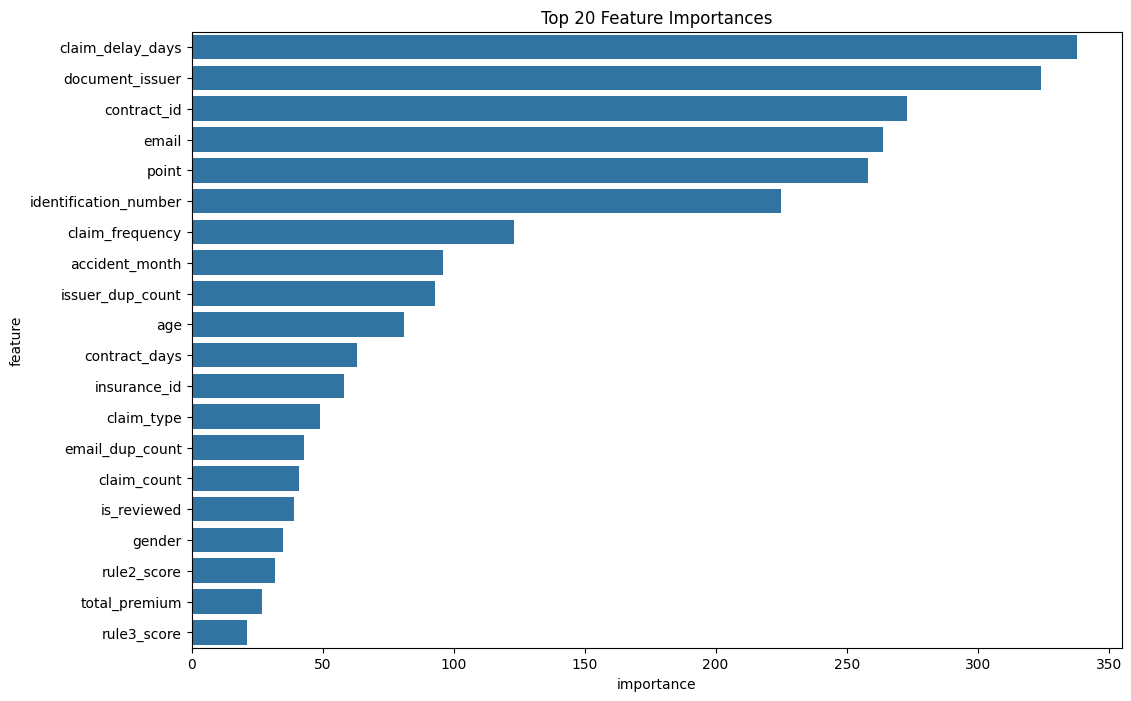

In [202]:
from sklearn.metrics import confusion_matrix, classification_report

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:')
print(conf_matrix)

# 분류 보고서
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:')
print(class_report)

# 중요 변수 시각화
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({
    'feature': gbm.feature_name(),
    'importance': gbm.feature_importance()
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.show()


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# LightGBM 최적의 하이퍼파라미터로 다시 모델 학습 (Optional)
best_params = study.best_params
best_params['objective'] = 'binary'
best_params['metric'] = 'auc'
best_params['boosting_type'] = 'gbdt'
best_params['verbosity'] = -1
best_params['seed'] = 42


gbm = lgb.train(
    best_params,
    lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=100)],
    feval=f1_metric,
)

# 예측 확률
preds = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# 기존 CSV의 fraud_score 불러오기
# (claims_df는 이미 병합된 데이터프레임이라고 가정)
fraud_scores = LGBM_data.loc[claims_df['claim_id'].isin(X_test.index), 'fraud_score']

# 예측 확률과 fraud_score의 상관관계 계산
correlation = np.corrcoef(preds, fraud_scores)[0, 1]
print(f'Correlation between predicted probabilities and fraud_score: {correlation:.4f}')

# 시각화: 예측 확률 vs fraud_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=preds, y=fraud_scores, alpha=0.5)
plt.title('Predicted Probabilities vs Fraud Score')
plt.xlabel('Predicted Probability')
plt.ylabel('Fraud Score')
plt.show()

# 상관계수 히트맵
corr_matrix = pd.DataFrame({'predicted_prob': preds, 'fraud_score': fraud_scores}).corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	training's auc: 0.954625	training's f1: 0.409006	valid_1's auc: 0.612893	valid_1's f1: 0.176


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 400 and the array at index 1 has size 0